# Voronoi diagrams

In [1]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
# generate sample points and their labels
def get_sample(n, random_seed):
    np.random.seed(random_seed)
    mean = [20, 20]
    cov = [[30, 85], [85, 10]]
    X = np.random.multivariate_normal(mean, cov, n)
    y = np.array(range(n))
    return X, y

In [3]:
# use kNN with l_p metric to find closest points to points in a plane
def get_prediction(X, y, xx, yy, p, n_neighbors=1):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors, p=p)
    clf.fit(X, y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return Z

In [4]:
# generate sample points
X, y = get_sample(4, 10)

# set mesh size (how dense are points in the plane)
mesh_size = 0.1
# set border around sample points
border = 5

# generate meshgrid in the plane
x_min, x_max = X[:, 0].min() - border, X[:, 0].max() + border
y_min, y_max = X[:, 1].min() - border, X[:, 1].max() + border
xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_size),np.arange(y_min, y_max, mesh_size))

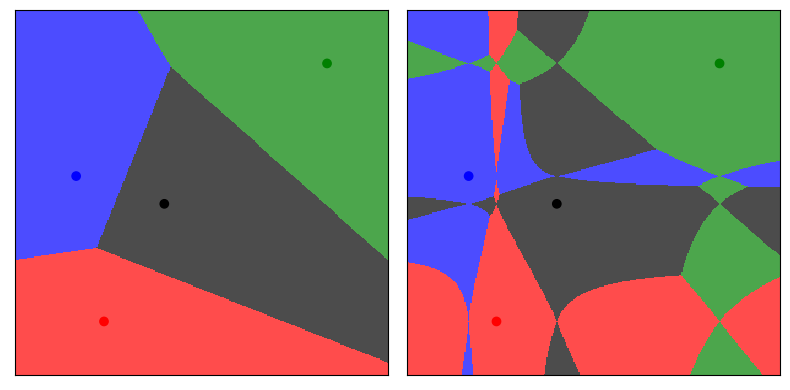

In [5]:
# set colors and opacity
cmap_bold = ListedColormap(['r','g','b','k'])
alpha = 0.7

# set figuresize
plt.figure(figsize=(8, 4))

# subplot for p = 2 (Euclidean metric)
ax1 = plt.subplot(121)

Z1 = get_prediction(X,y,xx,yy,2)
plt.pcolormesh(xx, yy, Z1, cmap=cmap_bold, alpha = alpha)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# subplot for p = 0.1
ax2 = plt.subplot(122, sharex=ax1, sharey=ax1)

Z2 = get_prediction(X,y,xx,yy,0.1)
plt.pcolormesh(xx, yy, Z2, cmap=cmap_bold, alpha = alpha)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.xticks([])
plt.yticks([])
plt.tight_layout()

# save figure
save_as = 'voronoi_diagrams'
plt.savefig('pictures/' + save_as)
plt.show()